# Installing Important Packages

In [ ]:
!pip install pytorch-tabnet
!pip install tabnet

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon

     |████████████████████████████████| 2.1 MB 20.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Importing Important Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
sns.set()
%matplotlib inline
import math
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from datetime import datetime
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from autogluon.tabular import TabularDataset, TabularPredictor
import pprint
from IPython.display import display
from sklearn.pipeline import Pipeline

from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer,  KBinsDiscretizer
from sklearn.impute import SimpleImputer
import torch
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

np.random.seed(0)
subsample_size = 600 # experiment with larger values to try AutoGluon with larger datasets

sns.set_style('whitegrid')

import os

import pandas_profiling as pp
from pandas_profiling import ProfileReport

# Loading Dataset

In [ ]:
dforiginal=pd.read_csv('/content/Complete-data.csv')

## Creating Copies of Dataset

In [ ]:
dfcopy1=dforiginal.copy()
dfcopy2=dforiginal.copy()
dataset=dforiginal.copy()

#Exploratory Data Analysis (EDA)

## Printing Data

In [ ]:
dforiginal

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1,4,2,1,4,2,5,1,5,3,2,4,2
1208,1,4,5,1,5,3,5,1,5,5,2,1,5
1209,1,3,4,1,5,2,5,2,3,3,2,2,5
1210,1,2,2,1,3,1,1,5,1,1,1,3,3


## Describing Data

In [ ]:
dforiginal.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.500000,2.962046,2.977723,2.102310,2.436469,2.338284,1.948845,3.042904,2.773927,3.059406,3.813531,3.262376,2.811881
std,0.500206,1.147378,1.099658,0.669812,1.242686,1.112686,1.424345,1.239246,1.299830,1.057287,1.347799,1.039502,1.194229
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,0.500000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Printing Column Titles

In [ ]:
dforiginal.columns

Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope'],
      dtype='object')

## Total No. of Rows and Columns

In [ ]:
dforiginal.shape

(1212, 13)

In [ ]:
#df['price'] = 100_000 * dataset.target
#df.columns = df.columns.get_level_values(0)



## Checking for Null Entries

In [ ]:
dforiginal.isna().sum().sum()

0

## Checking Outliers: Boxplots

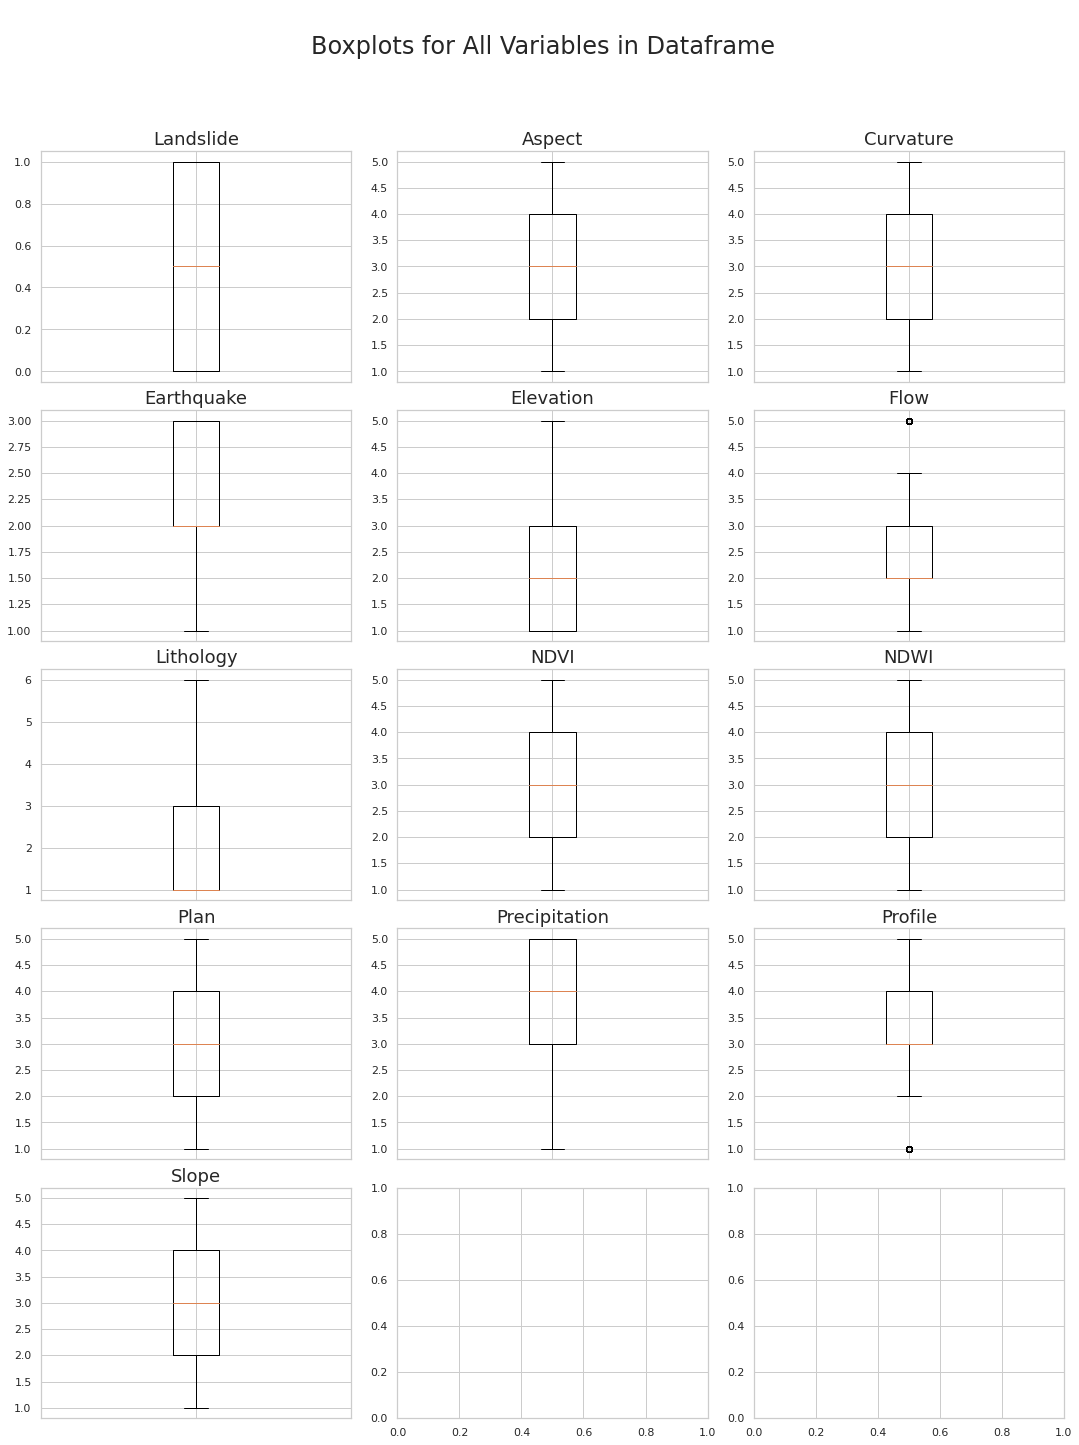

In [ ]:
def gen_boxplots(dataframe, cols, file=None):
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (figwidth, figheight))
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(dataframe.columns):
        ax[i].boxplot(dataframe[column])
        
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_ylabel('', fontsize=14)
        ax[i].set_xlabel('', fontsize=14)
        ax[i].tick_params(labelbottom=False)
    fig.suptitle('\nBoxplots for All Variables in Dataframe', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return
gen_boxplots(dfcopy1, 3)

## Correlation: Half-masked Correlation Heatmap

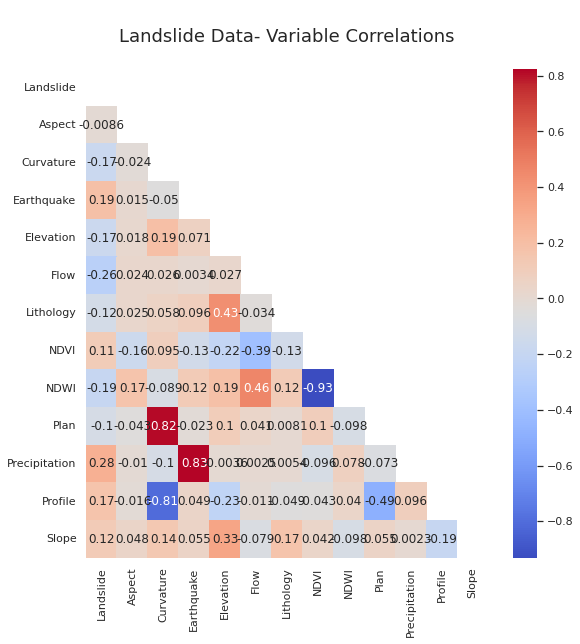

In [ ]:
# Required parameter: dataframe ... the reference pandas dataframe
# Optional parameters: title ... (string) chart title
#                      file  ... (string) path+filename if you want to save image


def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)

    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(), mask=mask, annot=True, cmap='coolwarm')

    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

half_masked_corr_heatmap(dforiginal, 'Landslide Data- Variable Correlations')

## N-across Line Charts with User-specified Rolling Averages

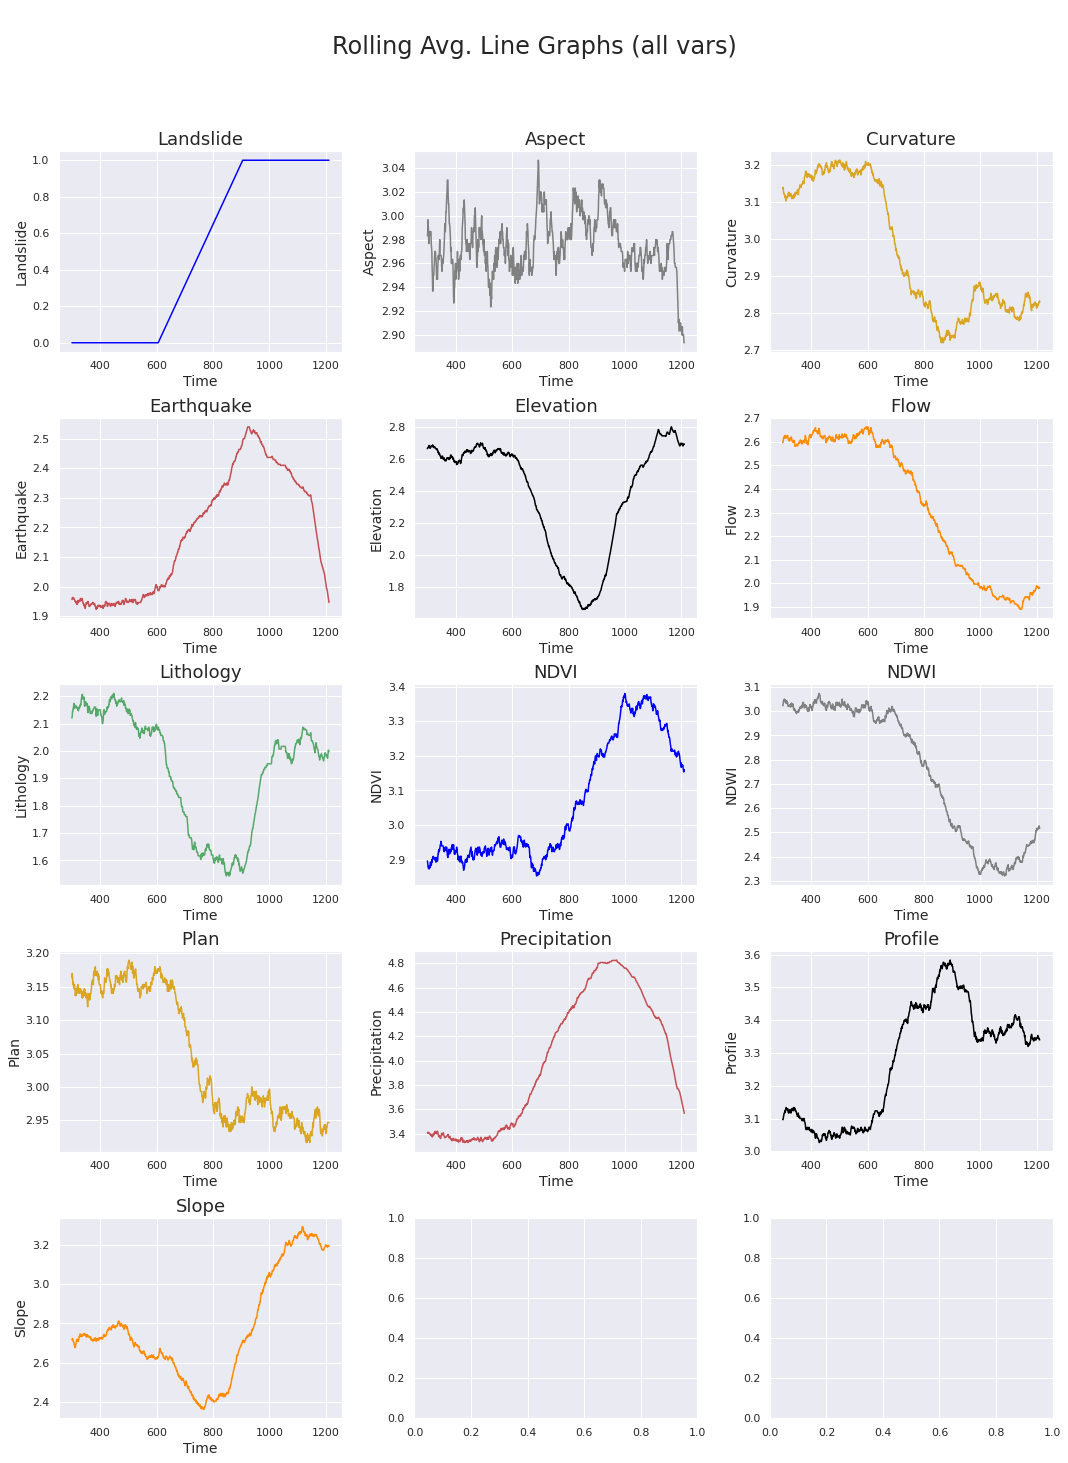

In [ ]:
def gen_linecharts_rolling(dataframe, roll_num, cols=1, file=None):
    list_of_columns = list(dataframe.columns)    
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows
    
    dataframe = dataframe.rolling(roll_num).mean()

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(list_of_columns):
        ax[i].plot(dataframe[column],
                   color=color_choices[i % len(color_choices)])
        
        ax[i].set_title(f'{column}', fontsize=18)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        ax[i].set_xlabel('Time', fontsize=14)
        
    fig.suptitle('\nRolling Avg. Line Graphs (all vars)', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

gen_linecharts_rolling(dforiginal, 300, 3)

# Splitting and saving data

In [ ]:
# split the data into train and test set
train, test = train_test_split(dforiginal, test_size=0.2, random_state=42, shuffle=True)
#train, test = train_test_split(df_split, test_size=0.2, random_state=42, shuffle=True)

# saving
train.to_csv('train-data.csv', index=False)
test.to_csv('test-data.csv', index=False)

# Model Implementaion: TabNet

## Data Preparation

In [ ]:
%%time
train = pd.read_csv('/content/train-data.csv')
test = pd.read_csv('/content/test-data.csv')

#train['Landslide'] = train.isna().sum(axis=1)
#test['Landslide'] = test.isna().sum(axis=1)
train['Landslide'] = train['Landslide'].astype(str)

features = [col for col in train.columns if col not in ['Landslide']]

pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median',missing_values=np.nan)),
        ("scaler", QuantileTransformer(n_quantiles=200, output_distribution='normal'))
        ])
X = pipe.fit_transform(train[features])
X_test=pipe.transform(test[features])

CPU times: user 90.7 ms, sys: 6.81 ms, total: 97.5 ms
Wall time: 145 ms


## Modeling

In [ ]:
tabnet_params = dict(n_steps = 1,
                   optimizer_fn=torch.optim.Adam,
                   optimizer_params=dict(lr=1e-2, weight_decay = 5e-4),
                   scheduler_params={"step_size":1, # how to use learning rate scheduler
                                     "gamma":0.9},
                   scheduler_fn=torch.optim.lr_scheduler.StepLR,
                   mask_type='entmax',
                   verbose = 5)

In [ ]:
from sklearn.model_selection import KFold
import torch

kf = KFold(n_splits=5, random_state = 40, shuffle = True)
preds = np.zeros((243,))
for  fold , (train_index, test_index) in enumerate(kf.split(X)):
    print(20*"*")
    print("Fold {}:".format(fold))
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = train.Landslide[train_index].values, train.Landslide[test_index].values

    clf = TabNetClassifier(**tabnet_params)
    clf.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=['train', 'valid'],
        eval_metric=['auc'],
        max_epochs= 100, patience=5,
        batch_size=1024*10, virtual_batch_size=128*10,
        num_workers=0,
        weights=1,
        drop_last=False
    ) 
    preds += clf.predict_proba(X_test)[:,1]
    print(preds.shape)

********************
Fold 0:
Device used : cpu
epoch 0  | loss: 0.69776 | train_auc: 0.52393 | valid_auc: 0.48698 |  0:00:00s
epoch 5  | loss: 0.61551 | train_auc: 0.58476 | valid_auc: 0.56375 |  0:00:00s
epoch 10 | loss: 0.60854 | train_auc: 0.58188 | valid_auc: 0.55756 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.56375
Best weights from best epoch are automatically used!
(243,)
********************
Fold 1:
Device used : cpu
epoch 0  | loss: 0.66842 | train_auc: 0.51763 | valid_auc: 0.55268 |  0:00:00s
epoch 5  | loss: 0.61322 | train_auc: 0.5619  | valid_auc: 0.52637 |  0:00:00s

Early stopping occurred at epoch 6 with best_epoch = 1 and best_valid_auc = 0.57703
Best weights from best epoch are automatically used!
(243,)
********************
Fold 2:
Device used : cpu
epoch 0  | loss: 0.68276 | train_auc: 0.50593 | valid_auc: 0.58567 |  0:00:00s
epoch 5  | loss: 0.62708 | train_auc: 0.54113 | valid_auc: 0.54321 |  0:00:00s

Early stopping

## Submission

In [ ]:
sub = pd.read_csv('/content/submissionfile.csv')

In [ ]:
sub.loc[:, 'Preds'] = sub.loc[:, 'Landslide']

In [ ]:
sub.iloc[:,1]= preds
sub=sub[['Preds']]
sub

,Preds
0,1.705638
1,2.399642
2,2.475575
3,2.716145
4,2.723090
...,...
238,2.567301
239,1.237589
240,2.767002
241,1.159979


In [ ]:
sub.to_csv('submission_TabNet.csv')

# Model Implementation: AutoGluon

## Data Preparation and Model Implementation

In [ ]:
train_data = TabularDataset('/content/train-data.csv')
train_data = train_data.head(subsample_size) # subsample data for faster demo
display(train_data.head())

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,1,2,4,3,2,5,4,3,3,5,5,3,1
1,0,3,2,1,3,1,6,4,1,2,1,4,2
2,0,5,2,2,2,3,1,4,3,2,3,3,2
3,0,3,2,1,4,2,1,5,1,2,2,4,4
4,1,3,4,3,3,2,2,4,2,4,5,3,3


In [ ]:
label_column = 'Landslide'
print("Possible values of target variable (with occurrence counts): \n", train_data[label_column].value_counts().to_string())
print("Summary of class variable: \n", train_data[label_column].describe())

Possible values of target variable (with occurrence counts): 
 0    301
1    299
Summary of class variable: 
 count    600.000000
mean       0.498333
std        0.500414
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Landslide, dtype: float64


In [ ]:
save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(label=label_column, path=save_path).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClass/"
AutoGluon Version:  0.3.1
Train Data Rows:    600
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11242.71 MB
	Train Data (Original)  Memory Usage: 0.06 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		

In [ ]:
test_data = TabularDataset('/content/test-data.csv')
y_test = test_data[label_column]  # values to predict
test_data_nolab = test_data.drop(columns=[label_column])  # delete label column to prove we're not cheating

predictor = TabularPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file
y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)

Loaded data from: /content/test-data.csv | Columns = 13 / 13 | Rows = 243 -> 243


Predictions:  
 0      1
1      1
2      0
3      1
4      0
      ..
238    1
239    1
240    1
241    0
242    0
Name: Landslide, Length: 243, dtype: int64


In [ ]:
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)
display(perf)

Evaluation: accuracy on test data: 0.7654320987654321
Evaluations on test data:
{
    "accuracy": 0.7654320987654321,
    "balanced_accuracy": 0.770703933747412,
    "mcc": 0.5363967708384773,
    "f1": 0.7488986784140969,
    "precision": 0.6967213114754098,
    "recall": 0.8095238095238095
}


{'accuracy': 0.7654320987654321,
 'balanced_accuracy': 0.770703933747412,
 'f1': 0.7488986784140969,
 'mcc': 0.5363967708384773,
 'precision': 0.6967213114754098,
 'recall': 0.8095238095238095}

## Submission

In [ ]:
y_pred.to_csv('submission_autogluon.csv')

## Leaderboard

In [ ]:
predictor.leaderboard(test_data, silent=True)


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetMXNet,0.806584,0.775000,0.522667,0.226351,6.083669,0.522667,0.226351,6.083669,1,True,12
1,RandomForestGini,0.798354,0.741667,0.129165,0.204957,1.126949,0.129165,0.204957,1.126949,1,True,5
2,ExtraTreesEntr,0.790123,0.716667,0.121150,0.103105,0.746232,0.121150,0.103105,0.746232,1,True,9
3,CatBoost,0.786008,0.741667,0.003543,0.001958,0.262848,0.003543,0.001958,0.262848,1,True,7
4,LightGBMLarge,0.786008,0.783333,0.043286,0.005720,0.476417,0.043286,0.005720,0.476417,1,True,13
5,RandomForestEntr,0.773663,0.733333,0.132515,0.103061,1.217702,0.132515,0.103061,1.217702,1,True,6
6,ExtraTreesGini,0.769547,0.725000,0.122604,0.103097,0.765751,0.122604,0.103097,0.765751,1,True,8
7,LightGBMXT,0.765432,0.775000,0.021291,0.014793,0.911302,0.021291,0.014793,0.911302,1,True,3
8,XGBoost,0.765432,0.800000,0.073743,0.005601,0.204573,0.073743,0.005601,0.204573,1,True,11
9,WeightedEnsemble_L2,0.765432,0.800000,0.077475,0.009856,0.587452,0.003731,0.004255,0.382879,2,True,14
